In [205]:
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.3.1

In [206]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [207]:
data = pd.read_csv('1B.tsv', delimiter='\t')

In [208]:
data.head(10)

,Gender,Birth Date,Height,Weight,family_history_with_overweight,High Calorie Meal Freq,Veggies in Meals freq,Daily Main Meals,Snack Frequency,Smoking,Daily Water Consumption,Weekly Physical Activity,Alcohol,Transportation,Obesity level
0,Female,2003/02/05,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,0.0,no,Public_Transportation,Normal_Weight
1,Female,2003/06/13,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,3.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,2001/06/25,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,2.0,Frequently,Public_Transportation,Normal_Weight
3,Male,1997/08/14,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,2.0,Frequently,Walking,Overweight_Level_I
4,Male,2002/05/14,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,1995/02/16,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,2001/01/07,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,1.0,Sometimes,Motorbike,Normal_Weight
7,Male,2002/04/28,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,3.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,2000/06/04,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,2002/05/09,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,1.0,no,Public_Transportation,Normal_Weight


# [LO 1,2,3 – 15 Points] Perform Exploratory Data Analysis (EDA) on the dataset. Identify the key findings and anomalies existing in the dataset. Make sure to handle the anomalies accordingly!



**Data Description**

In [209]:
data.describe()

,Height,Veggies in Meals freq,Daily Main Meals,Daily Water Consumption,Weekly Physical Activity
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1.701677,2.419043,2.685628,2.008011,1.010298
std,0.093305,0.533927,0.778039,0.612953,0.850592
min,1.450000,1.000000,1.000000,1.000000,0.000000
25%,1.630000,2.000000,2.658738,1.584812,0.124505
50%,1.700499,2.385502,3.000000,2.000000,1.000000
75%,1.768464,3.000000,3.000000,2.477420,1.666678
max,1.980000,3.000000,4.000000,3.000000,3.000000


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Birth Date                      2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   object 
 4   family_history_with_overweight  2111 non-null   object 
 5   High Calorie Meal Freq          2111 non-null   object 
 6   Veggies in Meals freq           2111 non-null   float64
 7   Daily Main Meals                2111 non-null   float64
 8   Snack Frequency                 2101 non-null   object 
 9   Smoking                         2111 non-null   object 
 10  Daily Water Consumption         2111 non-null   float64
 11  Weekly Physical Activity        2111 non-null   float64
 12  Alcohol                         21

In [211]:
# Splitting columns into categorical and numerical columns
cols = data.columns
num_cols = ['Height', 'Weight', 'Veggies in Meals freq', 'Daily Main Meals', 'Daily Water Consumption', 'Weekly Physical Activity']
cat_cols = ['Gender', 'Birth Date', 'family_history_with_overweight', 'High Calorie Meal Freq', 'Snack Frequency', 'Smoking', 'Alcohol', 'Transportation', 'Obesity level']

**Handle Missing Value**

In [212]:
for col in cols :
  print(f'{col}\n{data[col].unique()}\n')

Gender
['Female' 'Male']

Birth Date
['2003/02/05' '2003/06/13' '2001/06/25' ... '2003/11/15' '2002/08/05'
 '1999/06/01']

Height
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Weight
['64.0' '56.0' '77.0' ... '133.689352' '133.346641' '133.472641']

family_history_with_overweight
['yes' 'no']

High Calorie Meal Freq
['no' 'yes']

Veggies in Meals freq
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938

In [213]:
for col in cols :
  print(f'{col}\n{data[col].value_counts()}\n')

Gender
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Birth Date
Birth Date
2003/03/06    4
2004/08/29    4
2001/02/09    4
2006/08/02    4
1998/04/29    4
             ..
1994/08/07    1
2003/07/14    1
2005/04/30    1
2004/05/04    1
1999/06/01    1
Name: count, Length: 1730, dtype: int64

Height
Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64

Weight
Weight
delapan puluh    59
70.0             43
50.0             42
75.0             40
60.0             37
                 ..
65.140408         1
87.27989          1
67.083121         1
90.13868          1
133.472641        1
Name: count, Length: 1525, dtype: int64

family_history_with_overweight
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

High Calorie Meal Freq
High Calorie Meal Freq
yes    1866
no      245
Name: count,

In [ ]:
# Convert 'delapahpuluh' into 80
print((data['Weight'] == 'delapan puluh').sum())
data['Weight'].replace('delapan puluh', 80, inplace = True)

59


In [215]:
print((data['Weight'] == 'delapan puluh').sum())

0


In [216]:
# Change the data type for column Weight into numerical
data['Weight'] = pd.to_numeric(data['Weight'])

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Birth Date                      2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   High Calorie Meal Freq          2111 non-null   object 
 6   Veggies in Meals freq           2111 non-null   float64
 7   Daily Main Meals                2111 non-null   float64
 8   Snack Frequency                 2101 non-null   object 
 9   Smoking                         2111 non-null   object 
 10  Daily Water Consumption         2111 non-null   float64
 11  Weekly Physical Activity        2111 non-null   float64
 12  Alcohol                         21

In [218]:
# Delete dirty data on column Smoking -> 'hehe'
print((data['Smoking'] == 'hehe').sum())
data = data[data['Smoking'] != 'hehe']

3


In [219]:
print((data['Smoking'] == 'hehe').sum())

0


In [220]:
# Make column Age
data['Birth Date'] = pd.to_datetime(data['Birth Date'])
data['Age'] = (pd.Timestamp.now() - data['Birth Date']).dt.days // 365

In [221]:
num_cols.append('Age')
data.head()

,Gender,Birth Date,Height,Weight,family_history_with_overweight,High Calorie Meal Freq,Veggies in Meals freq,Daily Main Meals,Snack Frequency,Smoking,Daily Water Consumption,Weekly Physical Activity,Alcohol,Transportation,Obesity level,Age
0,Female,2003-02-05,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,0.0,no,Public_Transportation,Normal_Weight,21
1,Female,2003-06-13,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,3.0,Sometimes,Public_Transportation,Normal_Weight,21
2,Male,2001-06-25,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,2.0,Frequently,Public_Transportation,Normal_Weight,23
3,Male,1997-08-14,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,2.0,Frequently,Walking,Overweight_Level_I,27
4,Male,2002-05-14,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,22


In [222]:
data.isnull().sum()

Gender                             0
Birth Date                         0
Height                             0
Weight                             0
family_history_with_overweight     0
High Calorie Meal Freq             0
Veggies in Meals freq              0
Daily Main Meals                   0
Snack Frequency                   10
Smoking                            0
Daily Water Consumption            0
Weekly Physical Activity           0
Alcohol                            0
Transportation                     0
Obesity level                      0
Age                                0
dtype: int64

Because the missing value is insignificant (10 data out of 2111 row of data), i drop the missing value

In [223]:
data.dropna(inplace = True)

In [224]:
data.isnull().sum()

Gender                            0
Birth Date                        0
Height                            0
Weight                            0
family_history_with_overweight    0
High Calorie Meal Freq            0
Veggies in Meals freq             0
Daily Main Meals                  0
Snack Frequency                   0
Smoking                           0
Daily Water Consumption           0
Weekly Physical Activity          0
Alcohol                           0
Transportation                    0
Obesity level                     0
Age                               0
dtype: int64

**Handle Duplicate Data**

In [225]:
data.duplicated().sum()

0

**Handle Outlier**

In [252]:
data[num_cols].describe()

,Height,Weight,Veggies in Meals freq,Daily Main Meals,Daily Water Consumption,Weekly Physical Activity,Age
count,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000
mean,1.701986,86.708167,2.418780,2.686063,2.008505,1.010845,24.707817
std,0.093348,26.129714,0.534128,0.775192,0.612122,0.850146,6.395855
min,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,14.000000
25%,1.630000,66.000000,2.000000,2.660328,1.590670,0.128702,20.000000
50%,1.701331,83.000000,2.386464,3.000000,2.000000,1.000000,23.000000
75%,1.768770,107.850510,3.000000,3.000000,2.478129,1.663930,26.000000
max,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,61.000000


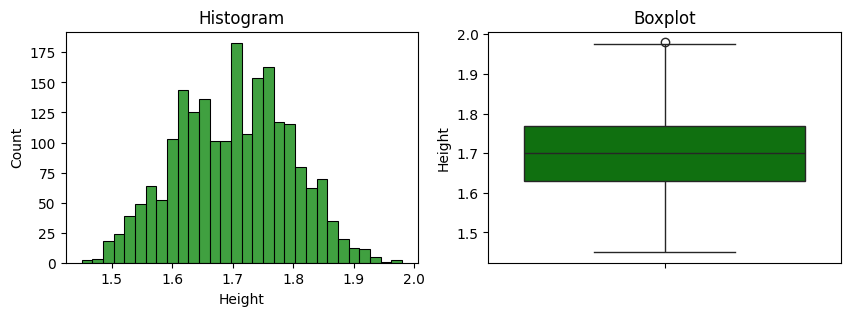

Skewness: -0.016612741379695563
Kurtosis: -0.5648844266144866


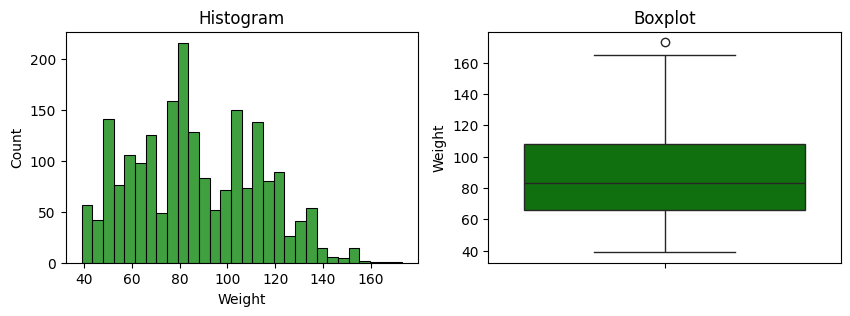

Skewness: 0.24258292184876148
Kurtosis: -0.711199392536312


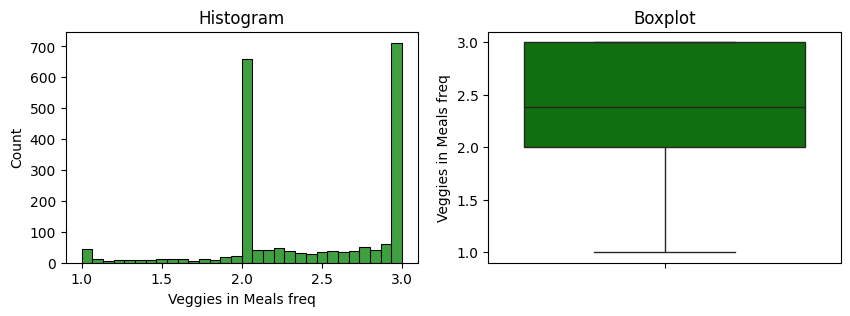

Skewness: -0.43569037809448413
Kurtosis: -0.6325988234169642


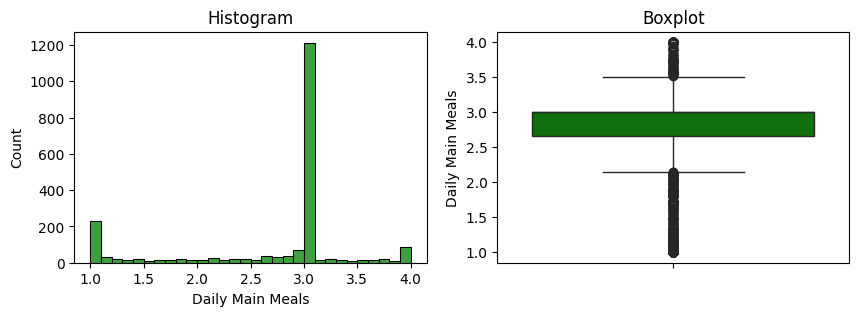

Skewness: -1.1155110324898299
Kurtosis: 0.4047587056778035


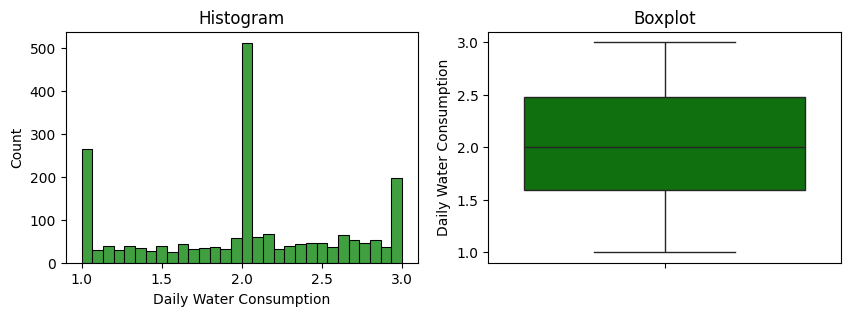

Skewness: -0.10598218715492506
Kurtosis: -0.8781904228266608


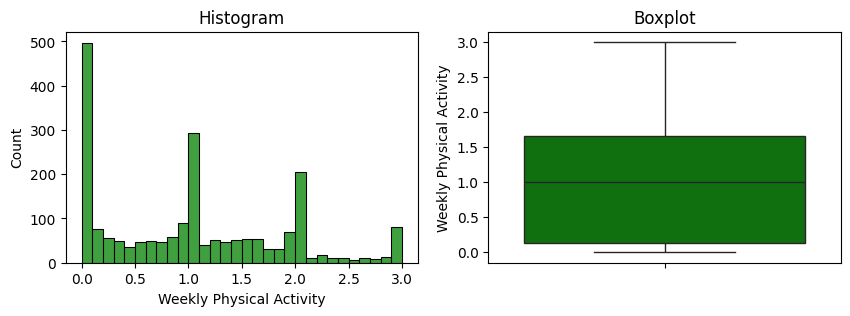

Skewness: 0.5015124639244274
Kurtosis: -0.612120927516079


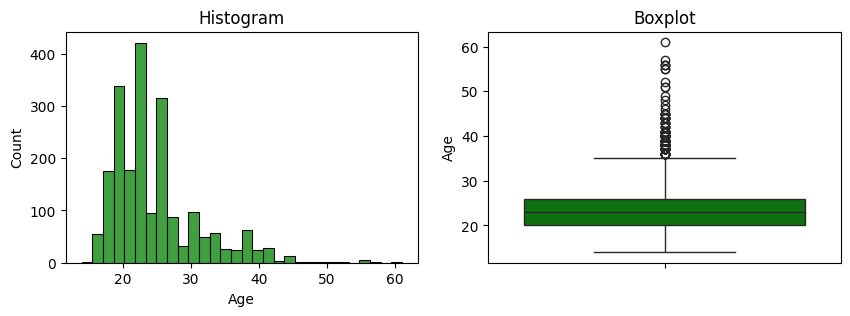

Skewness: 1.509700548713982
Kurtosis: 2.74903531087622


In [226]:
def check_dist(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30, color = 'green')
        plt.title('Histogram')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col], color = 'green')
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_dist(data[num_cols], num_cols)

From the plots above, we can see that all of the outliers from each columns is logical, so i dont do anyting to them

From the plots above, we can see that **'Height' and 'Daily Water Consumption'** have a **normal distribution**, whereas the rest is skewed

**Visualization**

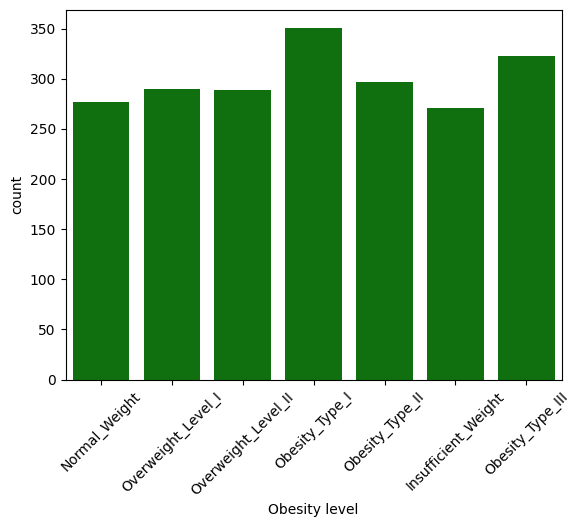

In [227]:
sns.countplot(x='Obesity level', data=data, color = 'green')
plt.xticks(rotation = 45)
plt.show()

From the plot above, we can see that this dataset is balanced in terms of y(target)

# [LO 1,2,3 – 5 Points] Train a Random Forest and an XGBoost model, fine-tune at least 3 of their hyperparameters with at least 3 search space and evaluate the models on an independent test set!

**Encoding**

In [228]:
data = data.drop(columns=['Birth Date'])
cat_cols.remove('Birth Date')

In [229]:
for col in cat_cols :
  print(f'{col}\n{data[col].unique()}\n')

Gender
['Female' 'Male']

family_history_with_overweight
['yes' 'no']

High Calorie Meal Freq
['no' 'yes']

Snack Frequency
['Sometimes' 'Frequently' 'Always' 'no']

Smoking
['no' 'yes']

Alcohol
['no' 'Sometimes' 'Frequently' 'Always']

Transportation
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

Obesity level
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Obesity_Type_II' 'Insufficient_Weight'
 'Obesity_Type_III']



In [230]:
data['Gender'].replace({'Female': 0, 'Male': 1}, inplace = True)
data['family_history_with_overweight'].replace({'no': 0, 'yes': 1}, inplace = True)
data['High Calorie Meal Freq'].replace({'no': 0, 'yes': 1}, inplace = True)
data['Smoking'].replace({'no': 0, 'yes': 1}, inplace = True)

In [231]:
# Use Ordinal Encoder -> Snack Frequency, Alcohol, Obesity level
# Use One Hot Encoder -> Transportation
ord = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'Sometimes', 'Frequently', 'Always'], ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
data[['Snack Frequency', 'Alcohol', 'Obesity level']] = ord.fit_transform(
    data[['Snack Frequency', 'Alcohol', 'Obesity level']]
)

In [232]:
onne = OneHotEncoder(sparse_output = False)
onnecol = ["Transportation"]
onned = onne.fit_transform(data[onnecol])
onnedata = pd.DataFrame(onned, columns = onne.get_feature_names_out(onnecol))

dat = data.copy().reset_index(drop = True)
dat = pd.concat([dat.drop(columns = onnecol), onnedata.astype('int')], axis = 1)

In [233]:
for col in dat.columns:
  print(f'{col}\n{dat[col].unique()}\n')

Gender
[0 1]

Height
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Weight
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

family_history_with_overweight
[1 0]

High Calorie Meal Freq
[0 1]

Veggies in Meals freq
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998  1.950742 2.277436 2.371338 2.984425 2.977018 2.663421
 2.753752 2.318355 2.5

**Split train and test data**

In [234]:
x = dat[dat.columns.drop('Obesity level')]
y = dat['Obesity level']

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=125)

In [236]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1678, 18)
(420, 18)
(1678,)
(420,)


In [237]:
print(x_train.iloc[105])

Gender                                    0.000000
Height                                    1.627532
Weight                                  106.690530
family_history_with_overweight            1.000000
High Calorie Meal Freq                    1.000000
Veggies in Meals freq                     3.000000
Daily Main Meals                          3.000000
Snack Frequency                           1.000000
Smoking                                   0.000000
Daily Water Consumption                   2.569713
Weekly Physical Activity                  0.000000
Alcohol                                   1.000000
Age                                      26.000000
Transportation_Automobile                 0.000000
Transportation_Bike                       0.000000
Transportation_Motorbike                  0.000000
Transportation_Public_Transportation      1.000000
Transportation_Walking                    0.000000
Name: 1949, dtype: float64


**Scalling**

In [238]:
# For Normal distribution columns use StandardScaler
# For skewed columns use RobustScaler
normdist_col = ['Height', 'Daily Water Consumption']
nonnormdist_col = ['Weight', 'Veggies in Meals freq', 'Daily Main Meals', 'Age', 'Weekly Physical Activity']

std = StandardScaler()
rob = RobustScaler()
x_train[normdist_col] = std.fit_transform(x_train[normdist_col])
x_test[normdist_col] = std.transform(x_test[normdist_col])
x_train[nonnormdist_col] = rob.fit_transform(x_train[nonnormdist_col])
x_test[nonnormdist_col] = rob.transform(x_test[nonnormdist_col])

In [239]:
print(x_train.iloc[105])

Gender                                  0.000000
Height                                 -0.805865
Weight                                  0.561935
family_history_with_overweight          1.000000
High Calorie Meal Freq                  1.000000
Veggies in Meals freq                   0.661988
Daily Main Meals                        0.000000
Snack Frequency                         1.000000
Smoking                                 0.000000
Daily Water Consumption                 0.936622
Weekly Physical Activity               -0.663902
Alcohol                                 1.000000
Age                                     0.500000
Transportation_Automobile               0.000000
Transportation_Bike                     0.000000
Transportation_Motorbike                0.000000
Transportation_Public_Transportation    1.000000
Transportation_Walking                  0.000000
Name: 1949, dtype: float64


**Random Forest**

In [240]:
param = {
    'max_depth' : [10, 20, 30],
    'n_estimators' : [100, 150, 200],
    'min_samples_split' : [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=50)
grid_rf  = GridSearchCV(rf_model, param_grid= param, cv = 5)
grid_rf.fit(x_train, y_train)

best_paramrf = grid_rf.best_params_

In [241]:
print(best_paramrf)

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 150}


In [242]:
best_rf = grid_rf.best_estimator_
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=150, random_state=50)

In [243]:
y_predrf = best_rf.predict(x_test)

**XGBoost**

In [244]:
xgb_model = XGBClassifier(random_state=125)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.5, 0.1, 0.2],
}

grid_xgb = GridSearchCV(
    xgb_model,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5
)

grid_xgb.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=125, ...),
             param_grid={'learning_rate': [0.5, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [245]:
print(grid_xgb.best_params_)

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}


In [246]:
best_xgb = grid_xgb.best_estimator_
best_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [247]:
y_predxgb = best_xgb.predict(x_test)

# [LO 1,2,3,4 – 10 Points] Analyze the evaluation results based on at least 3 evaluation metrics and make a conclusion!

**1. Random Forest**

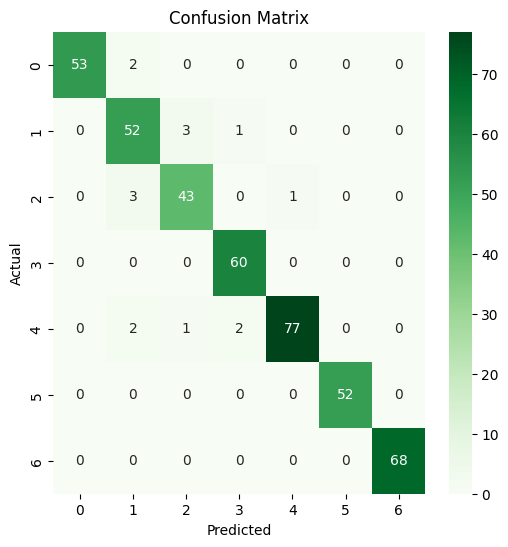

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        55
         1.0       0.88      0.93      0.90        56
         2.0       0.91      0.91      0.91        47
         3.0       0.95      1.00      0.98        60
         4.0       0.99      0.94      0.96        82
         5.0       1.00      1.00      1.00        52
         6.0       1.00      1.00      1.00        68

    accuracy                           0.96       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.97      0.96      0.96       420



In [248]:
cm1 = confusion_matrix(y_test, y_predrf)

plt.figure(figsize=(6,6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report')
print(classification_report(y_test, y_predrf))

Insights we gained from the model evaluation :
1. Overall, the model have good performance with 96% of accuracy. From the macro avg of precision recall and f1 score we can see that the model is perfoming consistantly well.
2. For all class, the precision and recall are high indicating small number of false positive, false negative. The high f1-score indicates the balanced between precision and recall in each class. 
3. From the confusion matrix we can also see that this model successfully identified(classified) data well, with only 1 or 2 mistake

**2. XGBoost**

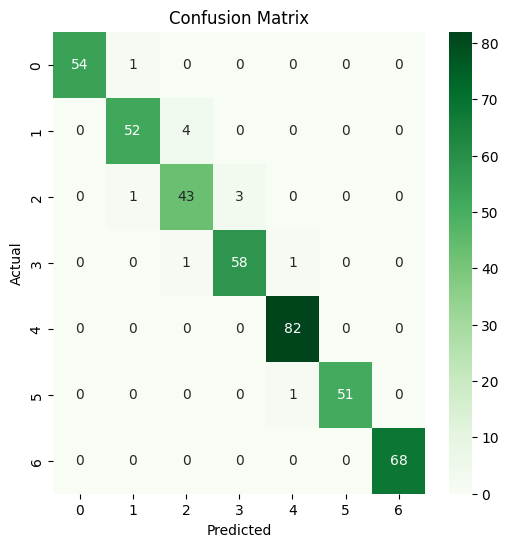

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        55
         1.0       0.96      0.93      0.95        56
         2.0       0.90      0.91      0.91        47
         3.0       0.95      0.97      0.96        60
         4.0       0.98      1.00      0.99        82
         5.0       1.00      0.98      0.99        52
         6.0       1.00      1.00      1.00        68

    accuracy                           0.97       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420



In [249]:
cm2 = confusion_matrix(y_test, y_predxgb)

plt.figure(figsize=(6,6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report')
print(classification_report(y_test, y_predxgb))

Insights we gained from the model evaluation :
1. Overall, the model have good performance with 97% of accuracy. From the macro avg of precision recall and f1 score we can see that the model is perfoming consistantly well.
2. For all class, the precision and recall are high indicating small number of false positive, false negative. The high f1-score indicates the balanced between precision and recall in each class. 
3. From the confusion matrix we can also see that this model successfully identified(classified) data well, with only 1 or 2 mistake
    

# Conclusion 
XGBoost model works better than Random Forest model in classifying data for class 4 (rfmodel misclassified class 4 more than XGBoost model) . But both work well with high evaluation score (accuracy at 97% and 96%)

# [LO 1,2,3,4 – 5 Points] From the best model, analyze which features can be considered important to predict the outputs!

**Feature Importance using best model**

                                 Feature  Importance
15              Transportation_Motorbike    0.000000
13             Transportation_Automobile    0.001938
14                   Transportation_Bike    0.006140
16  Transportation_Public_Transportation    0.011452
8                                Smoking    0.012335
3         family_history_with_overweight    0.015641
10              Weekly Physical Activity    0.018235
12                                   Age    0.022392
6                       Daily Main Meals    0.027684
17                Transportation_Walking    0.031911
9                Daily Water Consumption    0.033785
1                                 Height    0.041836
7                        Snack Frequency    0.054565
4                 High Calorie Meal Freq    0.064719
11                               Alcohol    0.069153
5                  Veggies in Meals freq    0.129921
2                                 Weight    0.154654
0                                 Gender    0.

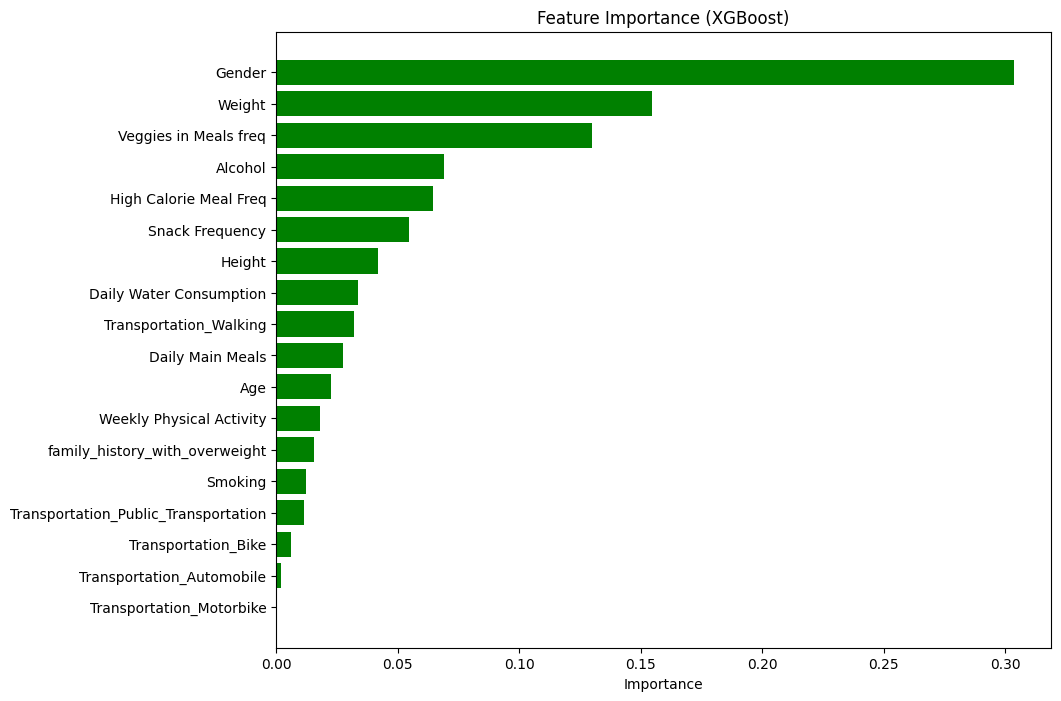

In [250]:
model = best_xgb
model.fit(x, y)

importance = model.feature_importances_
features = x.columns
feat_import_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_import_df = feat_import_df.sort_values(by='Importance', ascending=True)
print(feat_import_df)

plt.figure(figsize=(10, 8))
plt.barh(feat_import_df['Feature'], feat_import_df['Importance'], color='green')
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.show()

From the plot above, we can see that **Gender, Weight, Veggies in Meals Freq and ALcohol** are the **4 top** features that are important in predicting the output. Meanwhile, **Type of transportation** being the **least important** feature in predicting the output.